# Student Exam Performance Prediction


## 1. Problem statement

The objective of this project is to build a regression model for predicting the United States high school students' mathematics examination scores (column: 'math score') to identify academically strong students prior to the examination. 

If we can reach 80% accuracy at predicting students math exam scores during the proof of concept, the school will use this information to invite students to enroll in Advanced Placement (AP) courses. 


## 2. Data collection
We will use the Students Performance in Exams dataset from [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977). 
- This dataset describes the high school students from the United States (gender, race/ethnicity, parental background), the influence of other variables on students performance (lunch type, test preparation course), and their marks in various subjects (math score, reading score, and writing score).

Here's a wget-able [link](https://raw.githubusercontent.com/wanyingng/student-performance-prediction/refs/heads/main/notebook/data/StudentsPerformance.csv) to download the dataset:

```bash
wget https://raw.githubusercontent.com/wanyingng/student-performance-prediction/refs/heads/main/notebook/data/StudentsPerformance.csv
```

In [1]:
# !wget https://raw.githubusercontent.com/wanyingng/student-performance-prediction/refs/heads/main/notebook/data/StudentsPerformance.csv

### Import the necessary packages

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of python and libraries we're using
import matplotlib
import sklearn
!python --version
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2024-11-28 00:00:23.199674

Python 3.11.3
pandas version: 2.2.3
matplotlib version: 3.9.2
scikit-Learn version: 1.5.2


### Import the CSV data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

### Show the first 5 records of the dataset

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [6]:
df.shape

(1000, 8)

The dataset consists of 1000 records and 8 columns.

## 3. Data exploration and cleaning

Our goal here is to build an intuition of the dataset we're working with.

Since EDA has no real set methodolgy, here's a few questions to keep us right on track:
- What question(s) are you trying to solve (or prove wrong)?
- What kind of data do you have and how do you treat different types?
- What’s missing from the data and how do you deal with it?
- Where are the outliers and why should you care about them?
- How can you add, change or remove features to get more out of your data?

Quite often, we'll want to find:
- Distributions - What's the spread of the data? We can do this with `pd.DataFrame.hist(column="target_column")`.
- Missing values - Is our data missing anything? Why might this be the case and will this affect us going forward? We can do this with `pd.DataFrame.info()` or `pd.isnull()`.
- Outliers - Are there any samples that lay quite far outside the rest of our data's distributions? How might these affect the data going forward?


Let's start off by exploring the data types present in this dataset, the number of unique values for each column, the statistics of each numerical columns, the categories present in each categorical column and ensuring missing values and duplicates in the dataset are properly handled.



### Standardize the column names format

And before that, let's lowercase the column names and replace all whitespaces and slashes with underscores.

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')

In [8]:
df.head().T

,0,1,2,3,4
gender,female,female,female,male,male
race_ethnicity,group B,group C,group B,group A,group C
parental_level_of_education,bachelor's degree,some college,master's degree,associate's degree,some college
lunch,standard,standard,standard,free/reduced,standard
test_preparation_course,none,completed,none,none,none
math_score,72,69,90,47,76
reading_score,72,90,95,57,78
writing_score,74,88,93,44,75


In [9]:
df.tail().T

,995,996,997,998,999
gender,female,male,female,female,female
race_ethnicity,group E,group C,group C,group D,group D
parental_level_of_education,master's degree,high school,high school,some college,some college
lunch,standard,free/reduced,free/reduced,standard,free/reduced
test_preparation_course,completed,none,completed,completed,none
math_score,88,62,59,68,77
reading_score,99,55,71,78,86
writing_score,95,55,65,77,86


### Data Dictionary

We can see that the DataFrame has the following columns:
- `gender`: sex of students -> (male or female)
- `race_ethnicity`: ethnicity of students -> (group A, group B, group C, group D, or group E)
- `parental_level_of_education`: parents' highest level of qualification -> (bachelor's degree, some college, master's degree, associate's degree, high school, or some high school)
- `lunch`: type of lunch eaten before taking the test -> (standard or free/reduced) 
- `test_preparation_course` : whether the student has completed a test preparation course prior to taking the test -> (completed or none)
- `math_score`: the mark secured by the student in math exam
- `reading_score`: the mark secured by the student in reading exam
- `writing_score`: the mark secured by the student in writing exam

Although some of the columns are numerical, most are categorical. 

### Check for missing values

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

It seems like there are no missing values in this dataset. 

### Check for duplicates

In [11]:
df.duplicated().sum()

0

No duplicates values found in this dataset.

### Data type of each column

In [12]:
# Check for null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Our dataset consists of 3 numerical columns and 5 categorical columns.

### Number of unique values for each column

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Statistics of each numerical columns

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights on the numerical data:**
- The mean for the three subjects' scores are close to each other (between 66 and 69.16). This shows that there is no one subject that all students perform extremely well or poorly in.
- The mean and the median of each subject scores are close together. This indicates that the data set has a symmetrical distribution (not skewed too badly). 
- The high standard deviations of the three subjects (between 14.6 and 15.2) tell us that the average variation of the score around the mean is large and therefore, the scores are spread out.
- The maximum score for math, reading and writing is at 100.
- The minimum score for math is at 0, whereas the minimum score for reading and writing is at 17 and 10 respectively. 

In [15]:
# Define the numerical & categorical columns
numerical = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical = [feature for feature in df.columns if df[feature].dtype == 'O']

In [16]:
numerical

['math_score', 'reading_score', 'writing_score']

In [17]:
# Print the categories in each categorical feature
for feature in df[categorical]:
    unique_values = df[feature].unique()
    print(f"{feature}: {unique_values}")
    print()

gender: ['female' 'male']

race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']

parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch: ['standard' 'free/reduced']

test_preparation_course: ['none' 'completed']



In [18]:
perfect_reading_count = df[df['reading_score'] == 100]['gender'].count()
perfect_writing_count = df[df['writing_score'] == 100]['gender'].count()
perfect_math_count = df[df['math_score'] == 100]['gender'].count()

print(f'Number of students with full marks in Reading: {perfect_reading_count}')
print(f'Number of students with full marks in Writing: {perfect_writing_count}')
print(f'Number of students with full marks in Math: {perfect_math_count}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [19]:
reading_less_20_count = df[df['reading_score'] <= 20]['gender'].count()
writing_less_20_count = df[df['writing_score'] <= 20]['gender'].count()
math_less_20_count = df[df['math_score'] <= 20]['gender'].count()

print(f'Number of students with less than 20 marks in Reading: {reading_less_20_count}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20_count}')
print(f'Number of students with less than 20 marks in Math: {math_less_20_count}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Math: 4


**Insights on student performance in the three subjects:**
 - We have more students who performed poorly in Math than the other subjects, and more students who performed well in Reading than the other subjects.

## 4. Feature engineering

Feature engineering is the process of creating new features.

Let's combine `reading_score` and `writing_score` to create a new feature: `read_write_score`

This new feature could help improve our model in predicting students `math_score`. 

In [20]:
# Add a new column for "read_write_score"
df['read_write_score'] = df['reading_score'] + df['writing_score']

Now, let's combine all three subjects score to get the `total_score`. We'll use this feature to visualize the distribution of overall student performance in all three subjects. 

In [21]:
# Add a new column for "total_score"
df['total_score'] = df['reading_score'] + df['writing_score'] + df['math_score']

In [22]:
df.head().T

,0,1,2,3,4
gender,female,female,female,male,male
race_ethnicity,group B,group C,group B,group A,group C
parental_level_of_education,bachelor's degree,some college,master's degree,associate's degree,some college
lunch,standard,standard,standard,free/reduced,standard
test_preparation_course,none,completed,none,none,none
math_score,72,69,90,47,76
reading_score,72,90,95,57,78
writing_score,74,88,93,44,75
read_write_score,146,178,188,101,153
total_score,218,247,278,148,229


## 5. Data visualization


### Generate correlation matrix for the numerical features

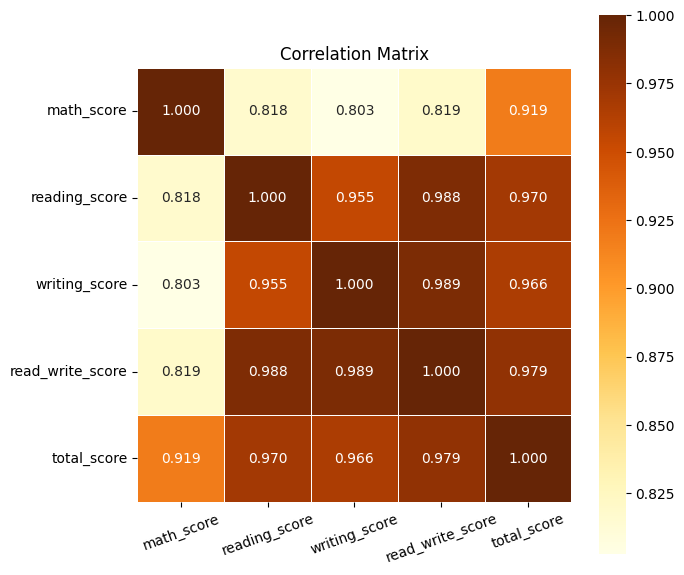

In [23]:
# Compute and plot the correlation coefficient between every pair of features
correlation_matrix = df[df.select_dtypes(include=np.number).columns].corr()
plt.figure(figsize=(7, 7))

sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr", fmt=".3f", linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=20)
plt.yticks(rotation=0)

plt.show()

**Insights:**
- There is a strong positive correlation between `read_write_score` and `math_score`, indicating a linear relationship in which an increase in `read_write_score` tends to be accompanied by an increase in `math_score`.

### Analyze the target variable (`math_score`) distribution
- Histogram
- Kernel density estimation (KDE)

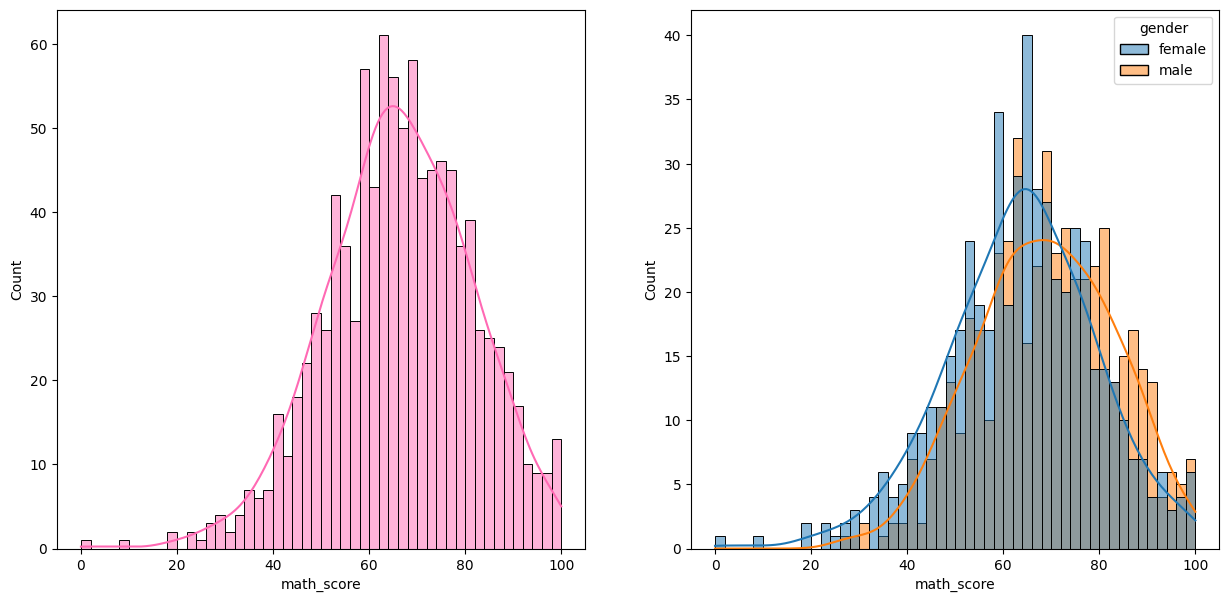

In [24]:
# Plot the histogram of math_score
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='math_score', bins=50, kde=True, color='hotpink')

# Plot the math_score with respect to gender
plt.subplot(122)
sns.histplot(data=df, x='math_score', bins=50, kde=True, hue='gender')

plt.show()

**Insights:**
- We'll just ignore the few outliers on the left. The shape of the graph resembles a bell-curve, which is called a normal distribution. 
- On average, male students seem to perform well in Math than female students.

### Analyze the engineered feature (`read_write_score`) distribution
- Histogram
- Kernel density estimation (KDE)

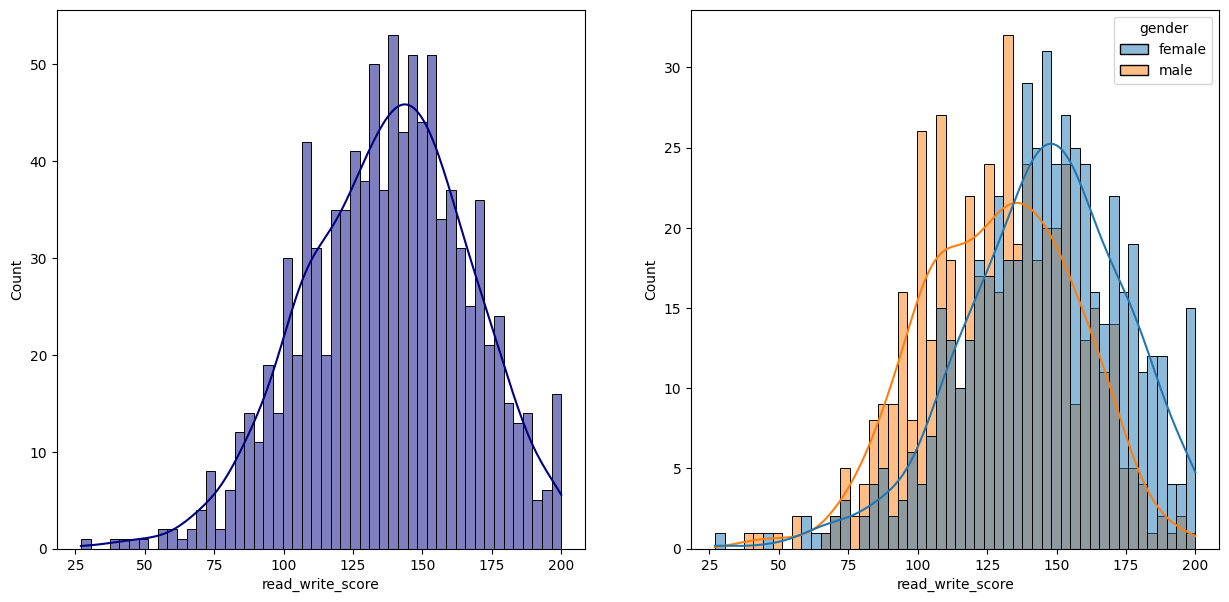

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='read_write_score', bins=50, kde=True, color='navy')

plt.subplot(122)
sns.histplot(data=df, x='read_write_score', bins=50, kde=True, hue='gender')

plt.show()

**Insights:**
- On average, female students seem to perform well in Reading and Writing than male students.

### Analyze the engineered feature (`total_score`) distribution
- Histogram
- Kernel density estimation (KDE)

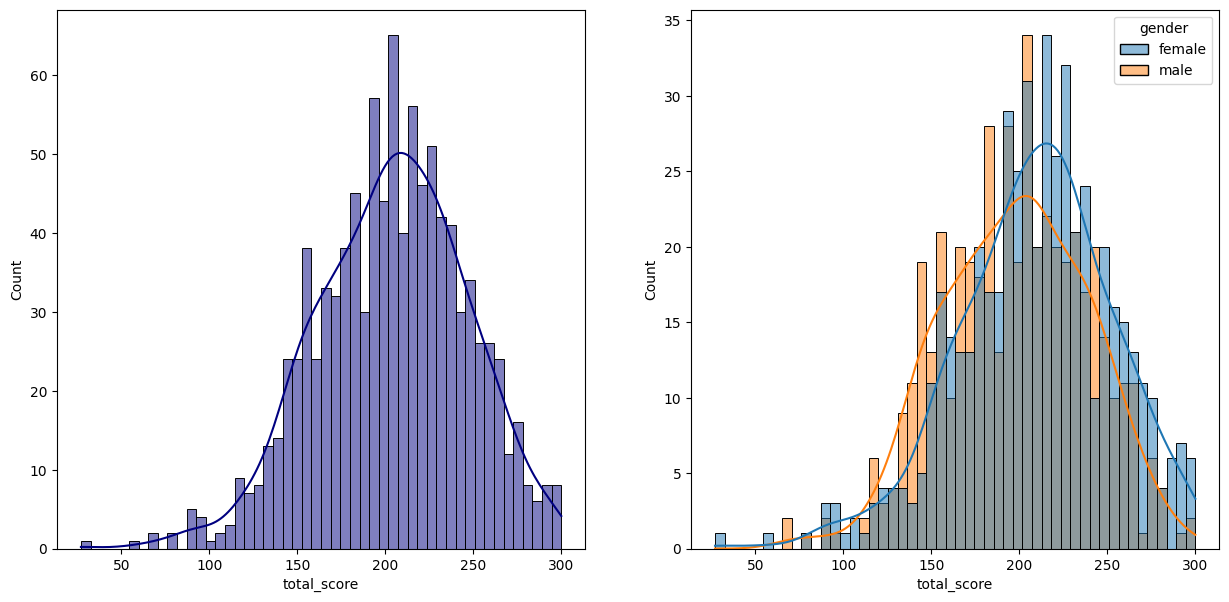

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=50, kde=True, color='navy')

plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=50, kde=True, hue='gender')

plt.show()

**Insights:**
- On average, female students also seem to perform better in overall than male students.

### Perform multivariate analysis using pairplot

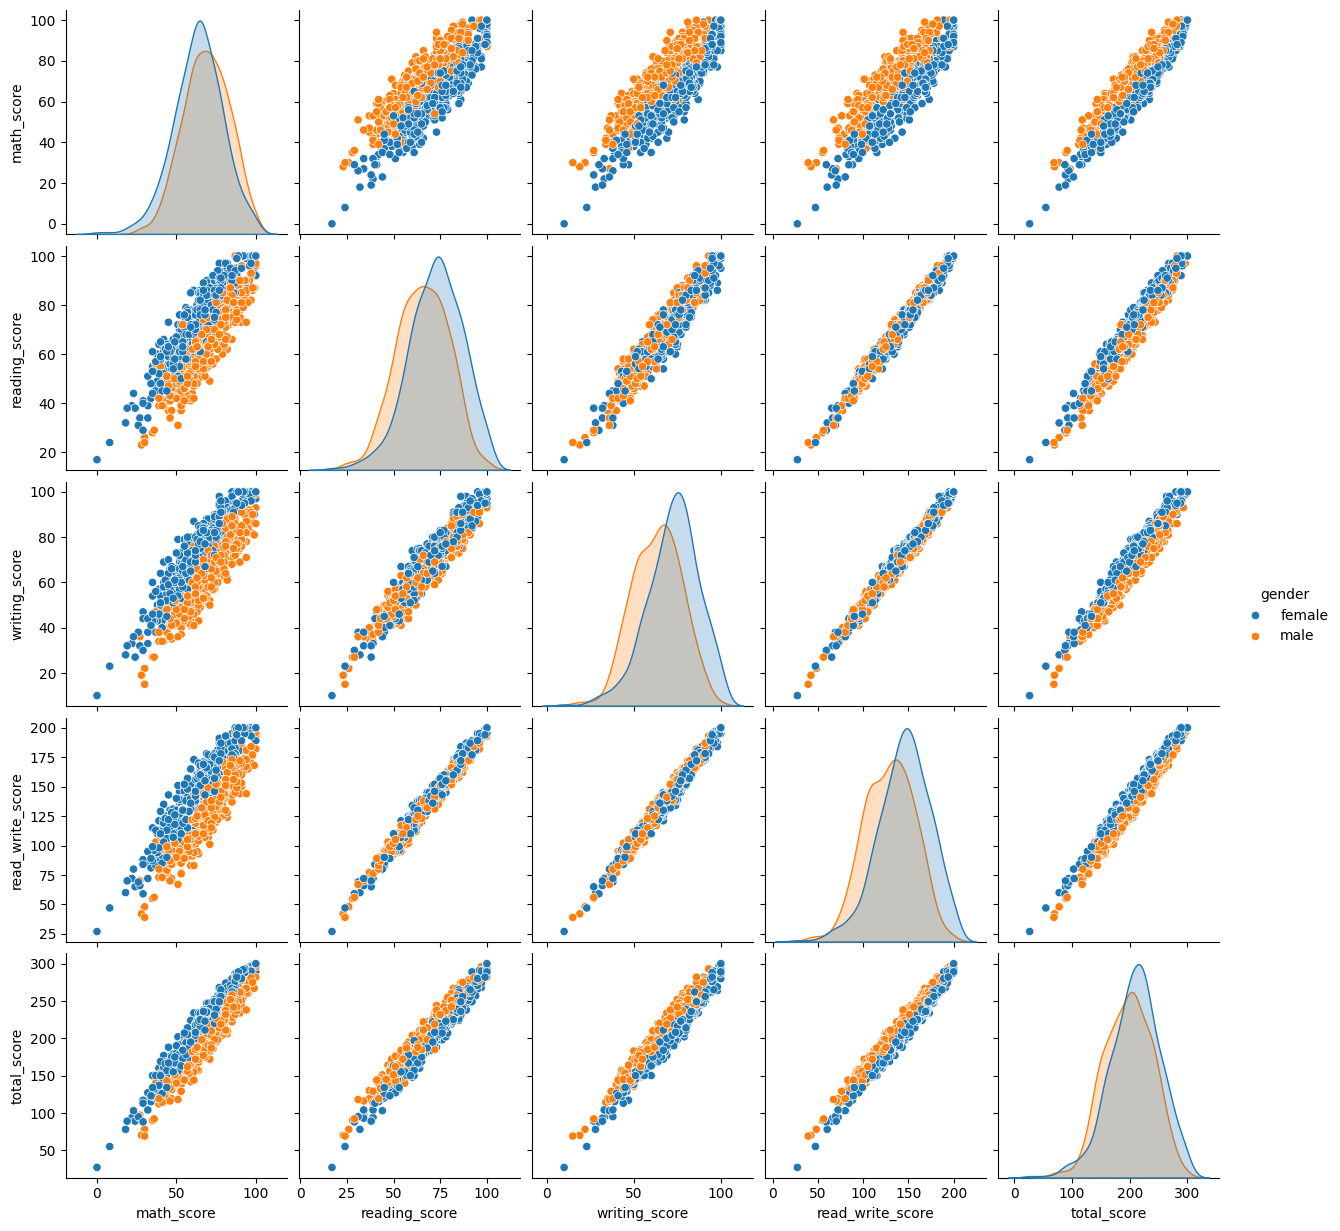

In [27]:
sns.pairplot(df, hue='gender')
plt.show()

**Insights:**
- All the scores increase linearly with each other.

### Check for outliers

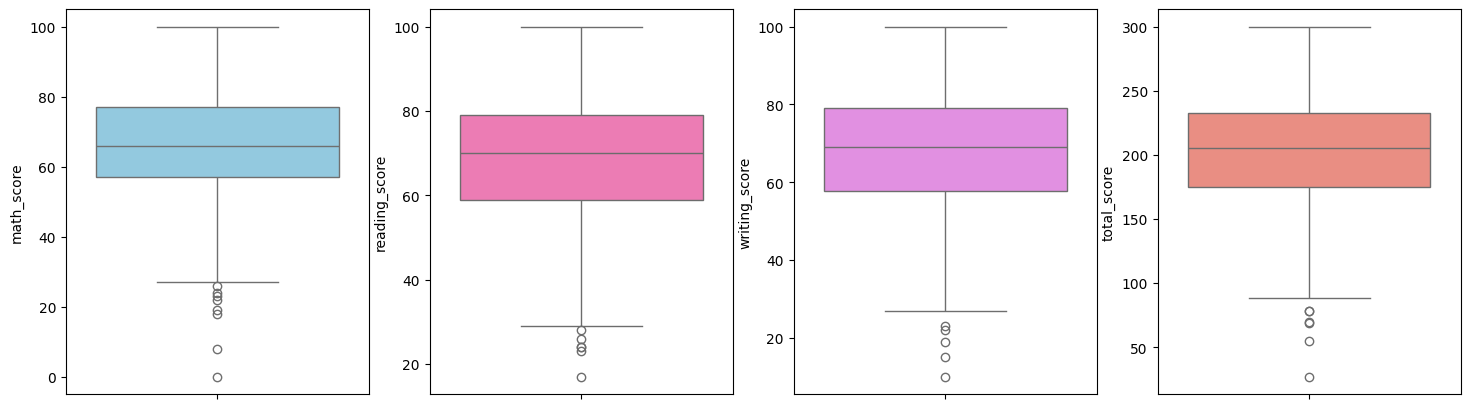

In [28]:
plt.subplots(1, 4, figsize=(18, 5))

plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing_score'], color='violet')

plt.subplot(144)
sns.boxplot(df['total_score'], color='salmon')

plt.show()